# Imersão em _matplotlib_

## _Backend_ x _frontend_

_Backends_ são mecanismos que agem "por detrás do palco" para construir as figuras. São de dois tipos:
    
- _Backend interativo_: utilizado para produzir figuras para uso em interfaces, tais como PyQt/PySide, PyGObject, Tkinter, wxPython e macOS/Cocoa.
- _Backend de impressão_: utilizado para produzir arquivos de imagem em formatos usuais, tais como SVG, PNG, PDF e PS.

### Configuração de _backend_

Útil para modificar propriedades padrão de estilo. Realizada de 3 formas:

1. Modificando as configurações de execução (_runtime configuration_), comumente chamadas de _rc settings_.
2. Definindo a variável de ambiente `MPLBACKEND`.
3. Usando a função `matplotlib.use()`.

#### Modificando as _rc settings_

Os parâmetros padrão são definidos em uma variável tipo `dict` denominada `rcParams`. Para alterar o _backend_, devemos alterar a propriedade de mesmo nome no arquivo de configuração `matplotlibrc`.

- Localize o arquivo:

In [36]:
import matplotlib as mpl
mpl.matplotlib_fname()

'/Users/gustavo/opt/anaconda3/envs/lecture/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

- Localize a linha do parâmetro `backend` e a modifique:

```
## the module name (which must be in the PYTHONPATH) as 'module://my_backend'.
#backend: Agg
```

Nota: se um _backend_ não for explicitamente definido, o _matplotlib_ usará o disponível no sistema operacional seguindo uma ordem de preferência, assim como se lê no `matplotlibrc`. Por exemplo:

```
## The default backend.  If you omit this parameter, the first working
## backend from the following list is used:
##     MacOSX Qt5Agg Gtk3Agg TkAgg WxAgg Agg
## Other choices include:
##     Qt5Cairo GTK3Cairo TkCairo WxCairo Cairo
##     Qt4Agg Qt4Cairo Wx  # deprecated.
##     PS PDF SVG Template
```

#### Definindo variável de ambiente

Se este método for usado, uma variável de ambiente pode ser definida para o _shell_ atual ou globalmente. Por exemplo:

```
export MPLBACKEND=macoxs
```

Entretanto, defini-la globalmente em arquivos de configuração, tais como `.bashrc` ou `.zshrc` pode não ser uma escolha sábia.

#### Usando a função `use()`

A função `matplotlib.use()` deve ser chamada apenas se o _script_ a ser executado depende de um _backend_ específico. Neste caso, a chamada deve preceder a criação de qualquer figura e ser aplicada toda vez que houver alterações de _backend_ entre usuários diferentes. O modo de chamá-la é:

```python
mpl.use('macosx')
```

### _Backends_ predefinidos, renderizadores e _canvas_

O _matplotlib_ possui _backends_ predefinidos e, em geral, um _backend_ padrão é carregado quando trabalhamos com plotagens, não sendo, a princípio, necessário tomar nenhuma ação por parte do usuário. 

Por outro lado, quando interfaces gráficas ou aplicações _web_ são pretendidas, manipular _backends_ pode ser inevitável. Visando facilitar o desenvolvimento de interfaces, o _matplotlib_ segmenta _backends_ em duas classes:

- renderizadores: entidades responsáveis pelo desenho;
- _canvas_: local onde o desenho é feito;

O renderizador canônico para interfaces é o `Agg`, baseado na biblioteca para C++ _Anti-Grain Geometry_, responsável pela rasterização das imagens. O `Agg` é utilizado pelos backends `QtAgg`, `GTK4Agg`, `GTK3Agg`, `wxAgg`, `TkAgg`, e `macosx`. Outro renderizador é baseado na biblioteca `Cairo`, tal como o `QtCairo`.


#### Rasterização e vetorização 

Os renderizadores podem ser classificados em dois tipos:

- rasterizadores: produzem imagens bidimensionais a partir de uma matriz retangular ou grade de pixels. O espaço de cores a que os pixels se submetem determina a imagem. Exemplos de arquivos de imagens rasterizadas são BMP, GIF, JPEG e PNG. São livres de escala.
- vetorizadores: produzem imagens diretamente a partir de formas geométricas, tais como pontos, retas, curvas e polígonos. Exemplos de arquivos de imagens vetorizadas são AI, CDR, SVG e EPS. A representação do pixel depende da resolução, em geral medida em pontos por polegada, i.e. DPI (_dots per inch_).

A geração de figuras com os _backends_ de impressão é feita por meio do comando

```python
mpl.pyplot.savefig('arquivo.X')
```
substituindo `X` pela extensão do arquivo desejado (ex.: png, pdf, ps, eps, svg, pgf).

Os _backends_ interativos são responsáveis por mostrar as figuras em tela (ex.: qtagg, ipympl, gtk3cairo, etc.)

## Dissecando um plot

O _matplotlib_ plota dados em um objeto abstrato chamado "Figura" (`Figure`), que contém um "eixo" (`Axes`) ou mais, que define a "área" de plotagem.

A maneira mais simples de se plotar algo é usando `pyplot.subplots` e `Axes.plot` como comandos essenciais.

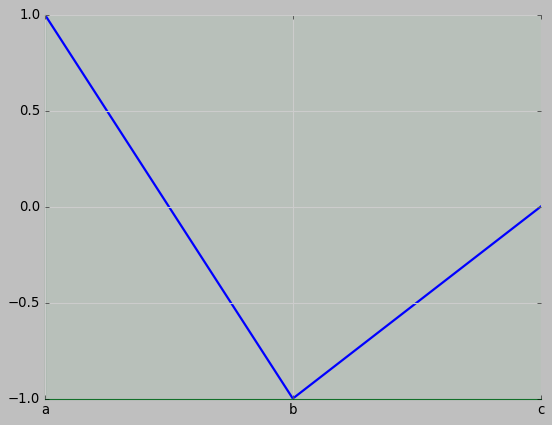

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # cria figura com eixo único
ax.plot(['a','b','c'],[1,-1,0]); # cria objeto lines.Line2D

### Anatomia de uma figura

Em matplotlib, `Artist` é uma classe abstrata que comporta vários objetos. `Figure`, `Axes`, `Axis`, `Text`, `Line2D`, `Patch` são todos "filhos" de `Artist`, mas considerados "artistas" do _canvas_. 

O resumo dos objetos é dado como segue:

- `FigureCanvas`: é uma espécie de contêiner para a Figura. Grosso modo, seria visto como a tela de pintura onde se passa a tinta.

- `Figure`: é um recipiente para um ou mais eixos. É possível criar um número arbitrário de figuras contendo linhas, textos e _patches_ próprios, todos independentes de quaisquer eixos.

- `Axes`: é a área retangular que contém os elementos básicos gerados pela plotagem.

- `Axis`: são os elementos que fornecem a escala, os limites e as marcas (_ticks_) e as legendas das marcas (_ticklabels_) que constituirão os eixos das abcissas e das ordenadas.

Nota: embora `Axes` signifique "eixo", este objeto determina a "área" de plotagem. Os objetos `Axis` ("eixos") correspondem aos eixos propriamente ditos (2 em 2D; 3 em 3D).

Abaixo, seguiremos um passo a passo para descrever a anatomia de uma figura construída com _matplotlib_. 

- Figura vazia sem eixos

In [38]:
fig = plt.figure() # figura vazia
# fig.show() # testar em prompt, visto que no Jupyter, o backend é inline.

<Figure size 640x480 with 0 Axes>

- Figura vazia com 1 eixo

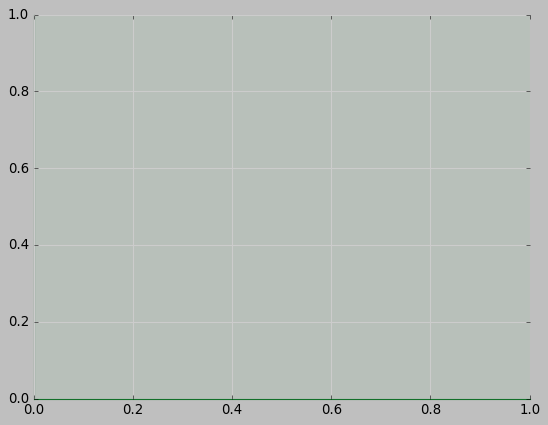

In [39]:
fig, ax = plt.subplots() # figura com 1 eixo

- Figura vazia com dois eixos

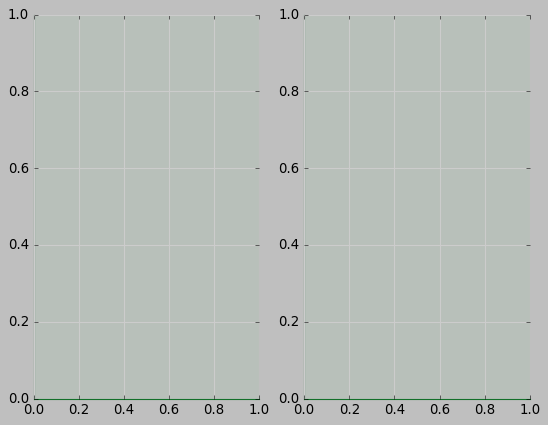

In [40]:
fig, ax = plt.subplots(1,2) # figura com 2 eixo

- Figura com propriedades alteradas

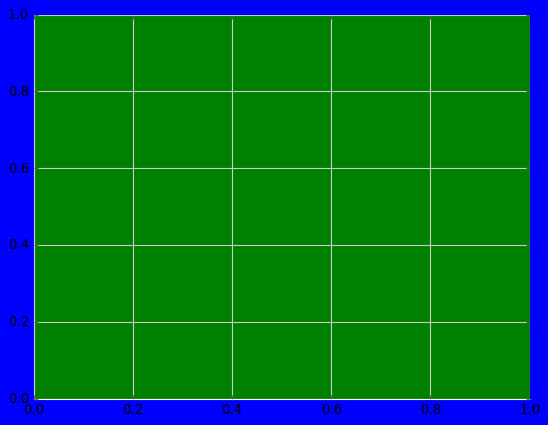

In [41]:
# altera propriedades
mpl.rcParams['figure.facecolor'] = 'blue'
mpl.rcParams['axes.facecolor'] = 'green'
mpl.rcParams['axes.edgecolor'] = 'white'
fig, ax = plt.subplots()

- Acessando _rc settings_. 

In [42]:
# localiza parâmetros do objeto especificado
# e imprime o nome de suas propriedades e valores
from re import match

art = 'axes' # axes
for k,v in mpl.rcParams.items():
    if match(art,k):                    
        print((k,v))

('axes.autolimit_mode', 'round_numbers')
('axes.axisbelow', False)
('axes.edgecolor', 'white')
('axes.facecolor', 'green')
('axes.formatter.limits', [-7, 7])
('axes.formatter.min_exponent', 0)
('axes.formatter.offset_threshold', 2)
('axes.formatter.use_locale', False)
('axes.formatter.use_mathtext', False)
('axes.formatter.useoffset', True)
('axes.grid', True)
('axes.grid.axis', 'both')
('axes.grid.which', 'major')
('axes.labelcolor', (0.54, 0.54, 0.54))
('axes.labelpad', 5.0)
('axes.labelsize', 14.0)
('axes.labelweight', 'normal')
('axes.linewidth', 1.0)
('axes.prop_cycle', cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k']))
('axes.spines.bottom', True)
('axes.spines.left', True)
('axes.spines.right', False)
('axes.spines.top', False)
('axes.titlecolor', 'auto')
('axes.titlelocation', 'center')
('axes.titlepad', 5.0)
('axes.titlesize', 16.0)
('axes.titleweight', 'normal')
('axes.titley', 1.0)
('axes.unicode_minus', True)
('axes.xmargin', 0.0)
('axes.ymargin', 0.0)
('axes3d.grid', Tr

- Alteração de propriedades selecionadas

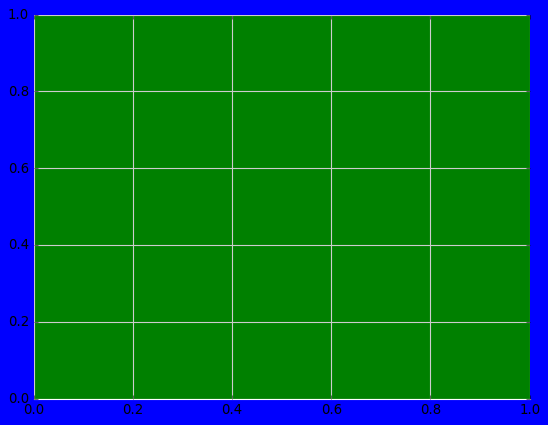

In [43]:
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
fig, ax = plt.subplots()

- Alteração de figura com eixos independentes

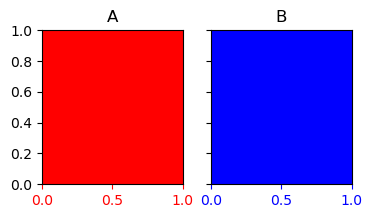

In [44]:
mpl.rcdefaults() # reset de parâmetros

fig, axs = plt.subplots(1,2,figsize=(4,2),
                        sharey=True)
# print(len(axs)) # note que há 2 eixos
axs[0].set_facecolor('red'); 
axs[0].set_title('A'); 
axs[0].tick_params(axis='x', colors='red')

axs[1].set_facecolor('blue')
axs[1].set_title('B'); 
axs[1].tick_params(axis='x', colors='blue')

- Plotagem de curvas

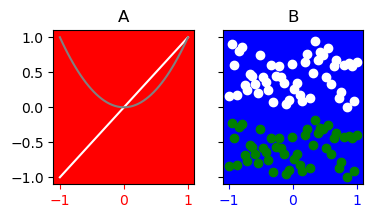

In [45]:
import numpy as np
x = np.linspace(-1,1)
z = np.random.rand(50)

axs[0].plot(x,x,c='w')
axs[0].plot(x,x**2,c='gray')

axs[1].scatter(x,z,c='w')
axs[1].scatter(x,np.sin(z)-1,c='g')

fig

### Template para função de auxílio (_helper function_) de plotagem 

O código abaixo define uma função de auxílio básica para plotagem genérica usando `plot`.

In [46]:
def h_plot(ax, x, y, params):
    """
    Helper function para gráficos simples e modificação de Line2D.
    """
    p = ax.plot(x, y, **params)
    return p

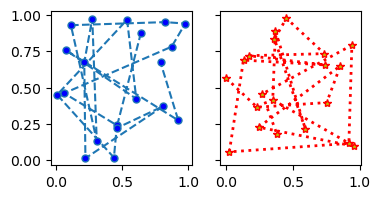

In [47]:
np.random.seed(3456)
n = 20
x1,y1,x2,y2 = np.random.rand(n),np.random.rand(n),np.random.rand(n),np.random.rand(n)
fig,(ax1,ax2) = plt.subplots(1,2,
                             sharey=True,
                             figsize=(4,2))

h_plot(ax1,x1,y1,{'ls':'--',
                  'marker':'o',
                  'ms':5,
                  'mfc':'b'})

h_plot(ax2,x2,y2,{'ls':':',
                  'c':'r',
                  'marker':'*',
                  'lw':2,
                  'mfc':'y'});

## Estilos de codagem

Plotagens genéricas podem ser executadas por meio de dois estilos de codagem:

- _explícito_, quando chamamos métodos a partir de objetos `Figure` e `Axes` (estilo orientação a objetos);
- _implícito_, quando usamos funções do submódulo `pyplot` para criar esses objetos implicitamente.

Todas as plotagens anteriores foram realizadas pelo modo explícito, mas, vejamos mais um exemplo e como ele se contrasta com o caso implícito.

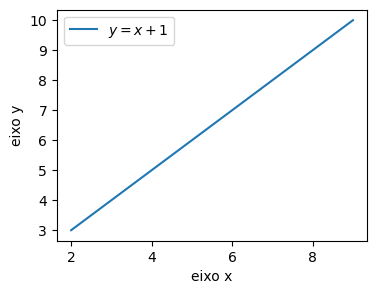

In [48]:
# exemplo de plotagem EXPLÍCITA (estilo POO)

x = np.arange(2,10) # domínio

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x,x+1,label='$y = x+1$')
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')
ax.legend();

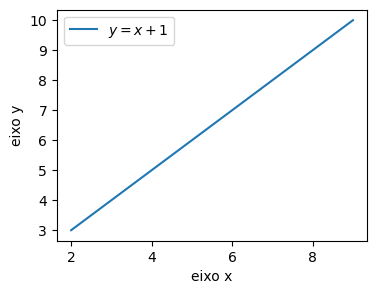

In [49]:
# exemplo de plotagem IMPLÍCITA (estilo pyplot)

x = np.arange(2,10) # domínio

plt.figure(figsize=(4,3))
plt.plot(x,x+1,label='$y = x+1$')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.legend();

Nota: o estilo explícito é recomendado para plotagens complicadas ou scripts reutilizáveis, ao passo que o estilo implícito é recomendado para plotagens simples e rápidas. 

## Estilização do `Artist`

Para exemplificar estilos, tomaremos como dado de exemplo a série temporal de anomalia de temperatura no período 2020 - 2021 para as coordenadas próximas à cidade de João Pessoa (7.1S,35.0W), disponibilizadas 
pelo [NOAA/NASA](https://www.ncei.noaa.gov/).

In [50]:
import pandas as pd

# série temporal de anomalia de temperatura: 2020 - 2021
# (lat,lot) = (7.1S,35.0W) :: JPA
jpa_temp = pd.read_csv('https://www.ncei.noaa.gov/cag/global/time-series/-7.1,-35/land_ocean/12/12/2000-2022/data.csv',
skiprows=4)

ano, temp = jpa_temp['Year'],jpa_temp['Anomaly']

A seguir, temos uma plotagem em mosaico (`subplot_mosaic`) com formatação independente por eixos. Para criar um mosaico, usamos um formato de matriz com _m_ linhas e _n_ colunas. Cada lista de _n_ elementos deve vir associada à _m_-ésima linha da matriz como uma "lista de listas".

O mosaico tem a estrutura de uma matriz _2 x 3_. Utilizamos letras para referir-se às linhas, e números às colunas. Neste caso, o quadrante A2 e B3 são _dummies_.

Primeiramente, plotamos o esquema.

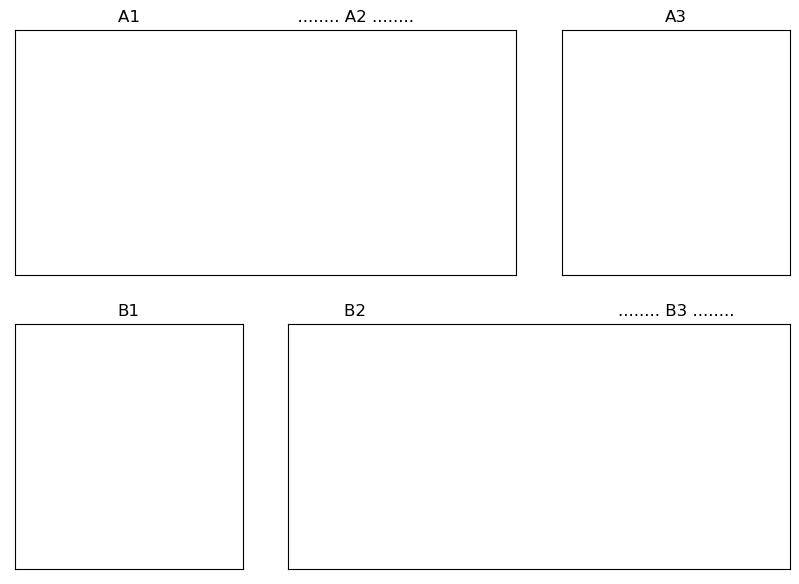

In [51]:
fix, axm = plt.subplot_mosaic([['A1','A1','A3'],['B1','B2','B2']],figsize=(10,7))

axm['A1'].set_title('A1' + ''.center(30,' ') + ' A2 '.center(20,'.'))
axm['A1'].set_xticks([])
axm['A1'].set_yticks([])

axm['A3'].set_xticks([])
axm['A3'].set_yticks([])
axm['A3'].set_title('A3')


axm['B1'].set_title('B1')
axm['B1'].set_xticks([])
axm['B1'].set_yticks([])

axm['B2'].set_xticks([])
axm['B2'].set_yticks([])
axm['B2'].set_title('B2' + ''.center(48,' ') + ' B3 '.center(20,'.'));

Em segundo lugar, plotamos os dados reais.

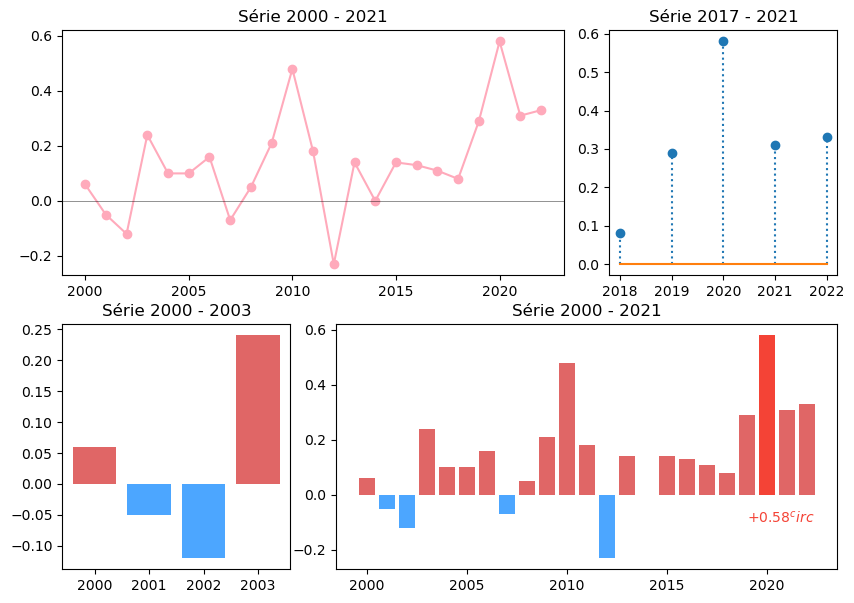

In [52]:
fix, axm = plt.subplot_mosaic([['A1','A1','A3'],['B1','B2','B2']],figsize=(10,7))

axm['A1'].plot(ano,temp,marker='o',c='#ffaabb')
axm['A1'].axhline(y=0,linewidth=0.5,alpha=0.6,color='k')
axm['A1'].set_title('Série 2000 - 2021')

axm['A3'].stem(ano[-5:],temp[-5:],markerfmt='o',linefmt=':',basefmt='-')
axm['A3'].set_title('Série 2017 - 2021')


# setup de cores para linha 2: 
# tons azuis (< 0); tons vermelhos (> 0)
c = ['#e06666']*len(temp)
for i,t in enumerate(temp):
     if t < 0:
        c[i] = '#4ca6ff'
c[temp.idxmax()] = '#f44336'

axm['B1'].bar(ano[:4],temp[:4],color=c)
axm['B1'].set_title('Série 2000 - 2003')

axm['B2'].bar(ano,temp,color=c)
axm['B2'].set_title('Série 2000 - 2021')

axm['B2'].text(2019, -.1, f'$+{temp.max()}^circ$',color='#f44336');


## Estilos padronizados

O _matplotlib_ dispõe de algumas dezenas de estilos padronizados para uso imediato. Para listá-los, invocamos `plt.style.available`. 

In [53]:
for i,e in enumerate(plt.style.available):
    print(i+1,e)

1 Solarize_Light2
2 _classic_test_patch
3 bmh
4 classic
5 dark_background
6 fast
7 fivethirtyeight
8 ggplot
9 grayscale
10 seaborn
11 seaborn-bright
12 seaborn-colorblind
13 seaborn-dark
14 seaborn-dark-palette
15 seaborn-darkgrid
16 seaborn-deep
17 seaborn-muted
18 seaborn-notebook
19 seaborn-paper
20 seaborn-pastel
21 seaborn-poster
22 seaborn-talk
23 seaborn-ticks
24 seaborn-white
25 seaborn-whitegrid
26 tableau-colorblind10


Para carregar os estilos, usamos `plt.style.use(<style>)`, passando como o estilo como argumento.

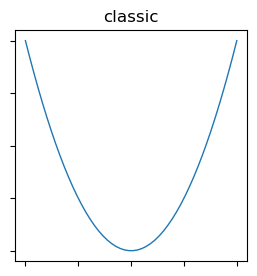

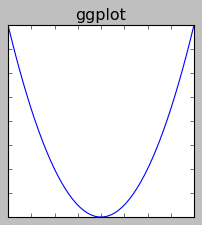

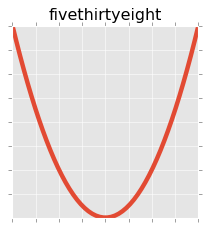

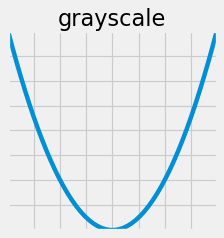

In [54]:
sty_test = ['classic','ggplot','fivethirtyeight',
'grayscale']

def plot_test(ax,sty):
    exec(f'plt.style.use(\'{sty}\')')
    x = np.linspace(-2,2)
    ax.plot(x,x**2 - 1,label='$y = x^2 - 1$')


for i,s in enumerate(sty_test):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title(sty_test[i])
    ax.set_xticklabels([]); ax.set_yticklabels([])
    plot_test(ax,s)  


# restabelece padrão
plt.rcdefaults(); 

## Estilos personalizados

É possível customizar o estilo das plotagens criando uma folha de estilo (_style sheet_) personalizada. A _style sheet_ pode ser criada seguindo um padrão similar ao encontrado em [CSS](https://www.w3schools.com/css/default.asp).

A folha de estilo possui extensão `mplstyle` e é carregada com `plt.style.use(<arquivo>.mplstyle)`.

Abaixo temos um extrato de uma _style sheet_ que modifica propriedades de `Axes` e `Grid`.

```
# AXES
axes.titlesize: 16
axes.labelsize: 14

# GRID
axes.grid: True
grid.alpha: 0.5
```

O código carrega a folha de estilo personalizada deste livro. Depois disso, o estilo das plotagens passa a obedecer às novas regras.

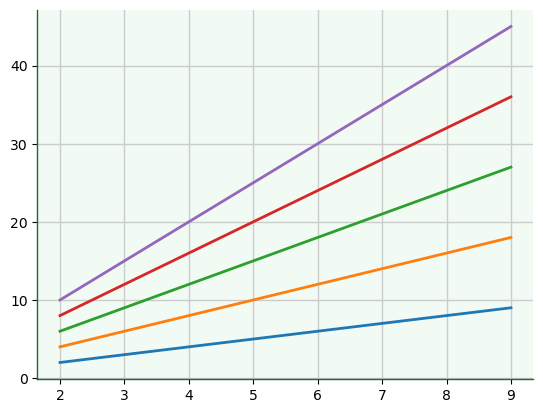

In [55]:
# plotagens em estilo personalizado
plt.style.use('../etc/gcpeixoto-datavis.mplstyle')
for k in range(1,6):
    plt.plot(x,k*x)

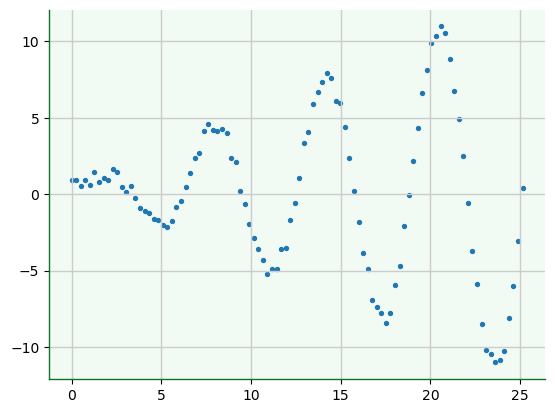

In [56]:
from numpy import sin, pi, linspace, random

np = 100
x = linspace(0,8*pi,np)
y = 0.5*x*sin(x) + random.rand(1,np)

plt.scatter(x,y,s=8)

## Introspecção do `Artist` 

A arquitetura do _matplotlib_ possui 3 camadas maiores:

1. Camada de base (_backend layer_), a mais interna.
2. Camada do artista (_artista layer_), a intermediária.
3. Camada de código (_script layer_), a mais externa.

Na maioria do tempo, usuários do _matplotlib_ escrevem códigos "na superfície" e manipulam o estilo visual das plotagens na camada intermediária. Raramente, o trabalho aprofunda-se na camada de base.

A fim de compreendermos melhor a camada `Artist`, é útil compreender os seguintes elementos:

- `matplotlib.backend_bases.FigureCanvas`, a área (tela de pintura) sobre a qual uma figura é desenhada;
- `matplotlib.backend_bases.Rendered`, o objeto que cuida da renderização no `FigureCanvas` (mente de quem pinta);
- `matplotlib.artist.Artist`, o objeto que usa o renderizador para pintar (pincéis e tintas);

Os dois primeiros estão na camada de base. O último está na camada intermediária. Como qualquer artista, vamos aprender a trabalhar com os materiais de pintura, propriamente ditos, os pincéis e as tintas.

Adicionalmente, existem dois tipos de `matplotlib.artist.Artist`: 

- _primitivos_: representam os objetos gráficos a serem desenhados (`Line2D`, `Rectangle`, `Text` etc.) 
- _contêineres_: representam os locais onde os objetos serão pintados (`Axis`, `Axes`, `Figure`).

O _pipeline_ de uso do _matplotlib_ basicamente depende da criação de uma `Figure` e da manipulação de `Axes`.

### Manipulando objetos

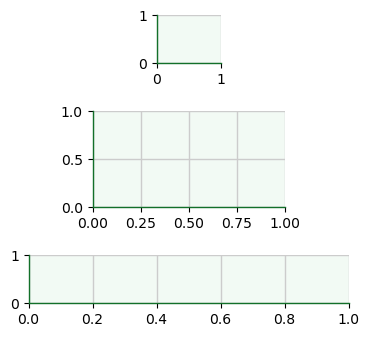

In [57]:
# nova figura
fig = plt.figure() 

# eixos
# (x_origem, y_origem, largura, altura)
rect1 = 0.0,1.5,0.5,0.1 
rect2 = 0.1,1.7,0.3,0.2
rect3 = 0.2,2.0,0.1,0.1
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2)
ax3 = fig.add_axes(rect3)

### `gets` e `sets`

As propriedades dos objetos são acessadas por `get` e modificadas por `set`.

In [58]:
# busca todas as propriedades
mpl.artist.getp(ax1)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.spines.Spine object at 0x119328730>, ...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_ratio = 1.0
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x119328730>, ...
    facecolor or fc = (0.51, 0.81, 0.58, 0.1)
    figure = Figure(640x480)
    frame_on = True
    gid = None
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 0 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.0, y0=1.5, x1=0.5, y1=1.6)
    rasterization_zorder = None
    rasterized = None
    renderer

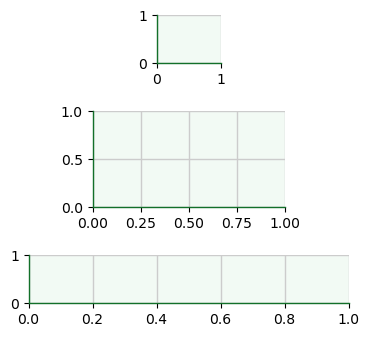

In [59]:
# busca valor da propriedade `get_frame_on()`
ax1.get_frame_on()
fig

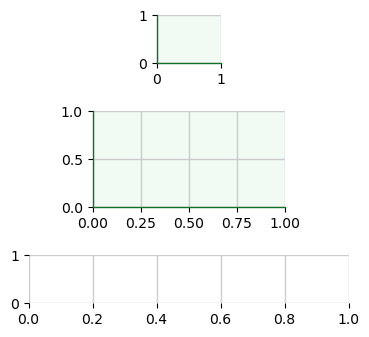

In [60]:
# altera valor da propriedade `get_frame_on()`
ax1.set_frame_on(False)
fig

In [61]:
plt.rcdefaults(); 

## Estilização temporária

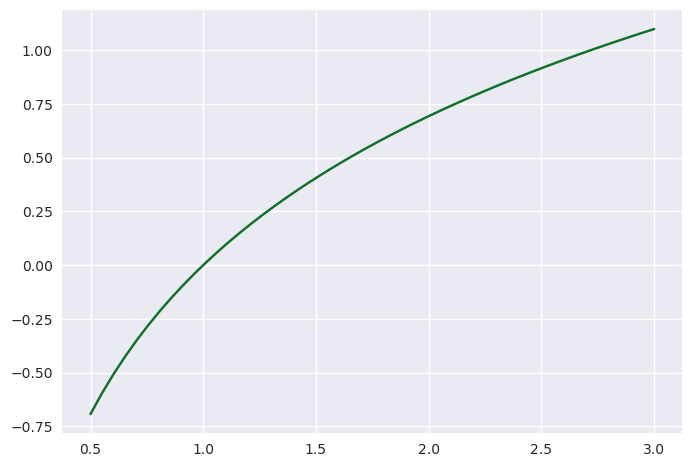

In [62]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,3)

with plt.style.context('seaborn'):
    plt.plot(x,np.log(x),c='#117029');

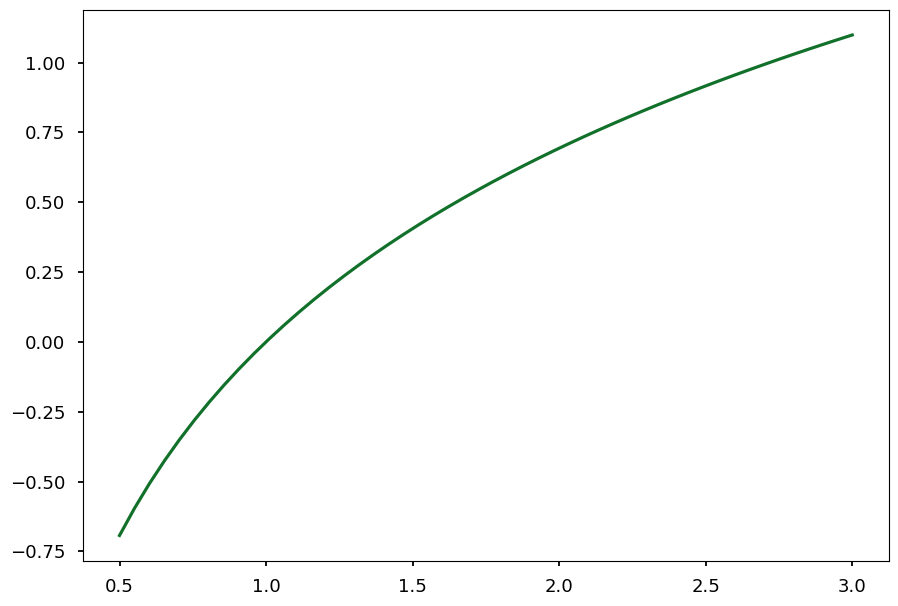

In [63]:
with plt.style.context('seaborn-talk'):
    plt.plot(x,np.log(x),c='#117029');